#### Imports

In [15]:

#Preprocesado de datos / carga de datos
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluación del modelo
from tensorflow.keras.models import load_model

#### Data

In [16]:
base_dir = "data"
train_dir = os.path.join(base_dir, 'train-cat-rabbit')
test_dir = os.path.join(base_dir, 'test-images')
valid_dir = os.path.join(base_dir, 'val-cat-rabbit')

#### Técnicas de Escalamiento y Preprocesado

In [ ]:
train_datagen = ImageDataGenerator(
#Técnicas de preprocesamiento de datos para mejorar la categorización del modelo
				rescale = 1./255, 
				rotation_range = 20, 
				width_shift_range = 0.1, 
    			height_shift_range=0.1,
				zoom_range = 0.15,
				horizontal_flip = True,
				brightness_range=[0.5, 1.2] 
    )

validation_datagen = ImageDataGenerator(
#Técnicas de preprocesamiento de datos para mejorar la categorización del modelo
				rescale = 1./255, 
				rotation_range = 20, 
				width_shift_range = 0.1, 
    			height_shift_range=0.1,
				zoom_range = 0.15,
				horizontal_flip = True,
				brightness_range=[0.5, 1.2] 
    )

test_datagen = ImageDataGenerator(1./255)        # Escala los píxeles de las imágenes de prueba al rango [0, 1]


Found 1400 images belonging to 2 classes.
Found 315 images belonging to 2 classes.
Found 314 images belonging to 2 classes.


<Figure size 640x480 with 0 Axes>

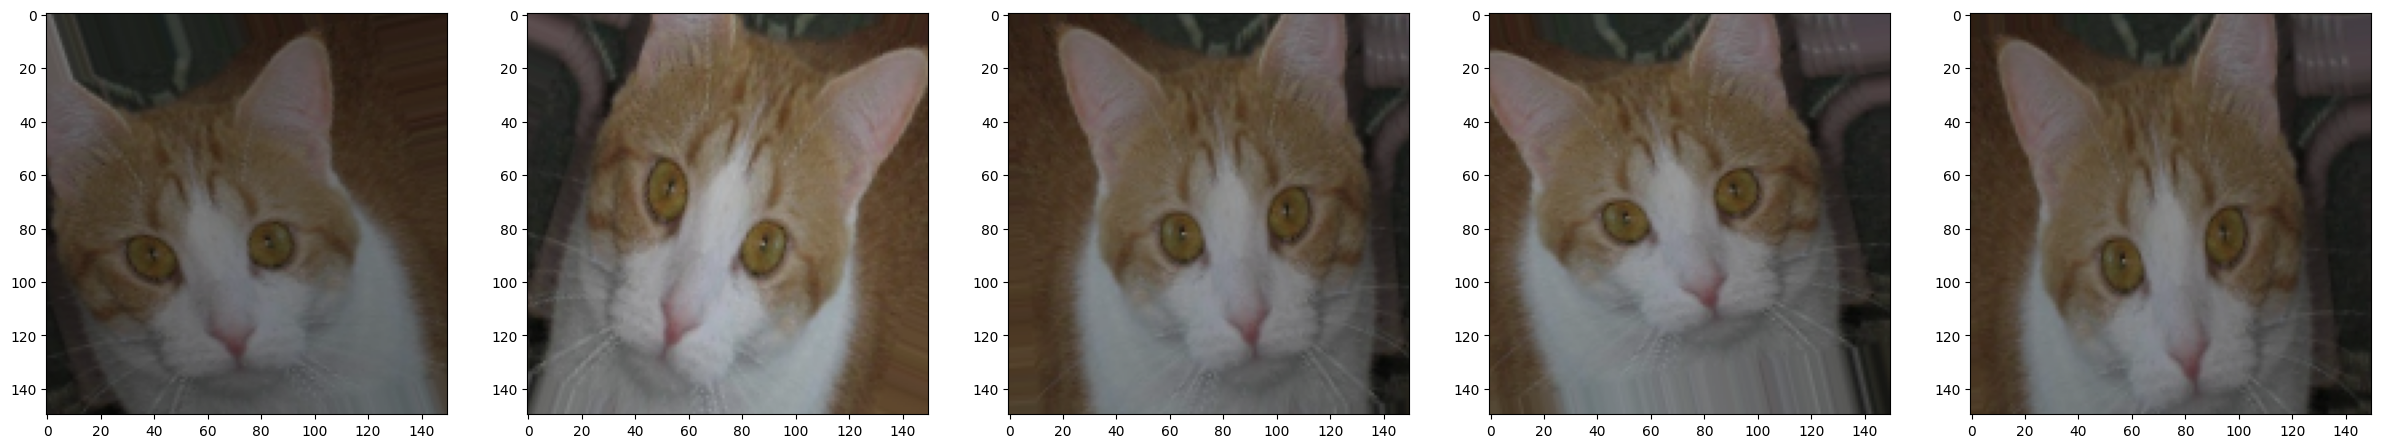

In [18]:

images_size = (150, 150) #Medida de las imágenes

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = images_size, # Tamaño al que se redimensionan las imágenes
							batch_size = 32,  # Tamaño del lote de imágenes por batch
							class_mode ='binary', # Tipo de etiquetas: 'binary' porque hay dos clases (gato y conejo)
       						shuffle = True 
							)


test_generator = test_datagen.flow_from_directory(
							test_dir,
							target_size = images_size,
							batch_size = 32,  
							class_mode ='binary',
       						shuffle = False		
   							)


validation_generator = validation_datagen.flow_from_directory(
							valid_dir,
							target_size = images_size, 
							batch_size = 32, 
							class_mode ='binary', 
							shuffle = False
							)


plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  	axarr[i].imshow(train_generator[0][0][0])

(32, 150, 150, 3)
[0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0.]


<Figure size 640x480 with 0 Axes>

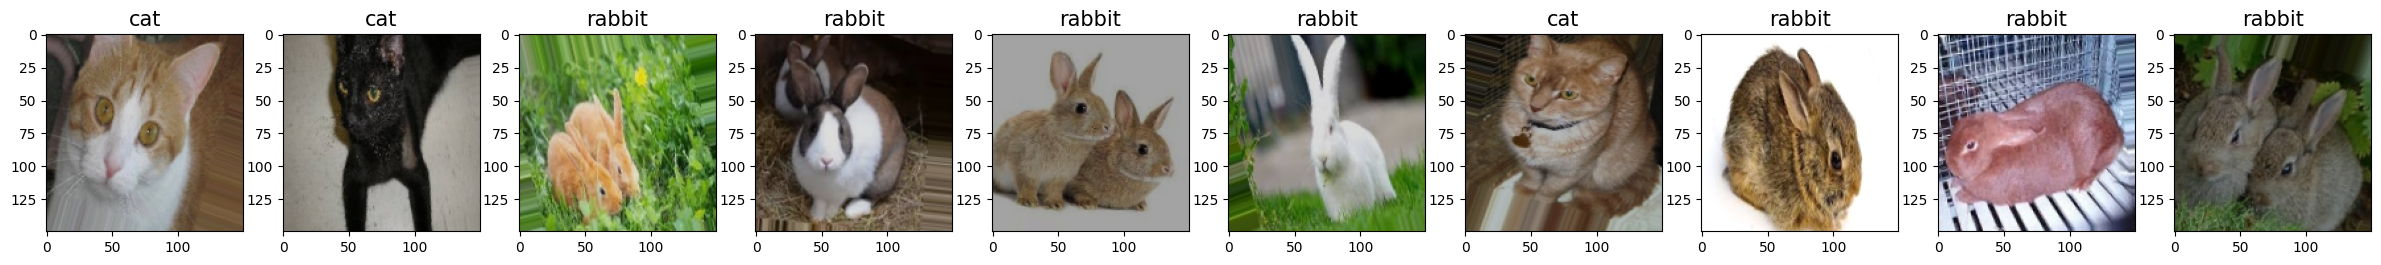

In [ ]:
# Visualizar imágenes y las etiquetas despúes de escalamiento y preprocesado
images, labels = train_generator[0]
class_names = list(train_generator.class_indices.keys())

print(images.shape)
print(labels)

plt.figure()
f, axarr = plt.subplots(1, 10, figsize=(30, 7))

for i in range(10):
    axarr[i].imshow(images[i])
    axarr[i].set_title(class_names[int(labels[i])], fontsize=15)


#### Modelo

In [20]:
# Crear el modelo CNN

model = Sequential([
    # Capa 1: Convolucional con 32 filtros de 3x3, función de activación ReLU, y tamaño de entrada 150x150x3 
    # Capa de MaxPooling para redicir las dimensiones de la salida
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    # Capa 2: Convolucional con 64 filtros de 3x3, función de activación ReLU 
    # Capa de MaxPooling para redicir las dimensiones de la salida    
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    #Capa 3: Convolucional con 128 filtros de 3x3, función de activación ReLU
    #Capa de MaxPooling para redicir las dimensiones de la salida
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    #Aplanar la salida para pasarla a capas más densas
    Flatten(),
    
    #Poner en 0 de forma aleatoria un porcentaje de neuronas durante cada paso de entrenamiento
    Dropout(0.3),
    
    #Capa densa con 512 neuronas y función de activación ReLU
    #Capa de salida con una neurona de activación sigmoide para clasificar los gatos y conejos
    Dense(128, activation= "relu"),
    Dense(1, activation='sigmoid') 
])

# Compilar el modelo con optimizador Adam, pérdida binaria y métrica de precisión
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar resumen de la arquitectura del modelo
model.summary()

C:\Users\casas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
        train_generator,              # Conjunto de entrenamiento con data-augmentation
        epochs=15,                    
        validation_data = validation_generator,   # Conjunto de validación para monitoreo
        verbose=1                     # Muestra el progreso en pantalla
)


C:\Users\casas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 346ms/step - accuracy: 0.5448 - loss: 0.7118 - val_accuracy: 0.7293 - val_loss: 0.5537
Epoch 2/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.7623 - loss: 0.4948 - val_accuracy: 0.6975 - val_loss: 0.5953
Epoch 3/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 334ms/step - accuracy: 0.7502 - loss: 0.4796 - val_accuracy: 0.7739 - val_loss: 0.4748
Epoch 4/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 324ms/step - accuracy: 0.8096 - loss: 0.4101 - val_accuracy: 0.7834 - val_loss: 0.4577
Epoch 5/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 346ms/step - accuracy: 0.8045 - loss: 0.4273 - val_accuracy: 0.7675 - val_loss: 0.4588
Epoch 6/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 329ms/step - accuracy: 0.8345 - loss: 0.3827 - val_accuracy: 0.7898 - val_loss: 0.4260
Epoch 7/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 310ms/step - accuracy: 0.8237 - loss: 0.3836 - val_accuracy: 0.7994 - val_loss: 0.4586
Epoch 8/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 331ms/step - accuracy: 0.8489 - loss: 0.3507 - val_accu

In [ ]:
# Guardar el modelo 
model.save('segundo_modelo.h5')

#### Evaluar el modelo

In [ ]:
model = load_model('segundo_modelo.h5')

In [40]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8003 - loss: 46.0760
Test accuracy: 0.8413


In [25]:
# Obtener predicciones
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Etiquetas verdaderas
y_true = test_generator.classes
# Nombres de clases
class_labels = list(test_generator.class_indices.keys())

# Reporte de métricas
print("Reporte:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Reporte:

              precision    recall  f1-score   support

         cat       0.90      0.78      0.83       160
      rabbit       0.80      0.91      0.85       155

    accuracy                           0.84       315
   macro avg       0.85      0.84      0.84       315
weighted avg       0.85      0.84      0.84       315



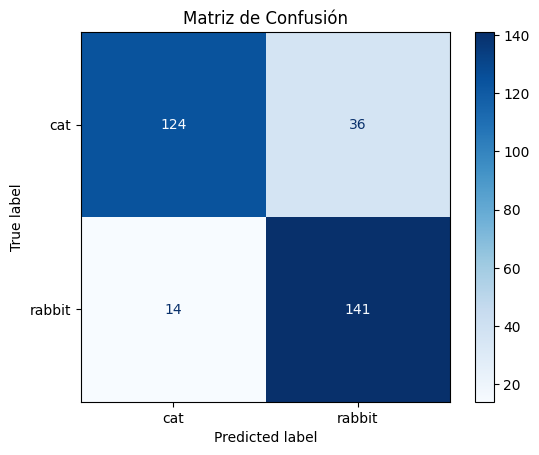

In [36]:
# Generar matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrar matriz de confusión 
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))
cm_display.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

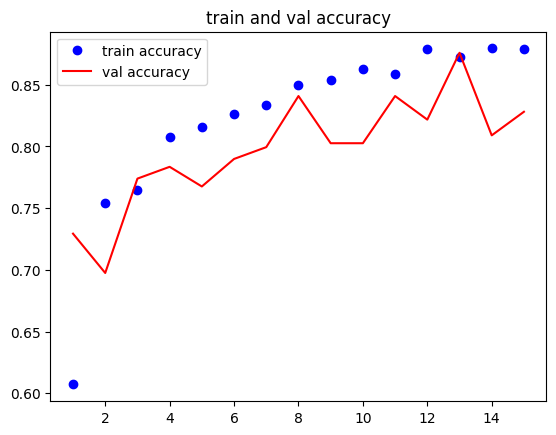

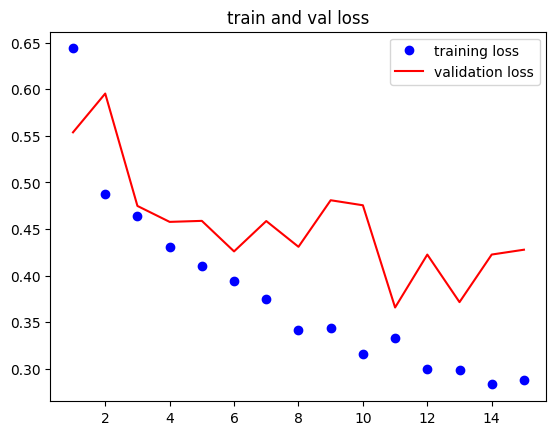

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# Accuracy

plt.figure()
plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc,'r',label='val accuracy')
plt.title('train and val accuracy')
plt.legend()
plt.show()

# Loss
plt.figure()
plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs, val_loss, 'r', label ='validation loss')
plt.title('train and val loss')
plt.legend()

plt.show()